In [1]:
#Compare versions of cascade simulations

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
from constants import *

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [4]:
#Load the data
import R68_load as r68

cap_v1=r68.load_simcap('/data/chocula/villaa/cascadeSimData/normsi_fast_200k.pkl')
cap_v2=r68.load_simcap('/data/chocula/villaa/cascadeSimData/si28_R68_400k.pkl')

Loading (n,gamma) Data...
200000
Loading (n,gamma) Data...
400000


In [5]:
cap_v1.keys()

dict_keys(['E', 'dE', 'N', 'tlive'])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


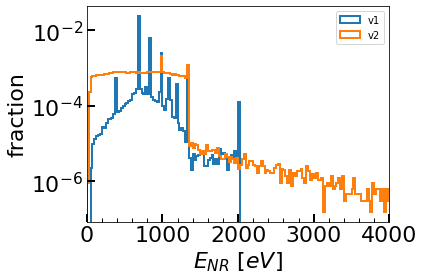

In [8]:
#Just look at the NRs
fig, ax = plt.subplots(1,1,figsize=(6.0,4.0))

NR_bins=np.linspace(0,5e3,201)

ax.hist(np.sum(cap_v1['dE'],1), bins= NR_bins, histtype='step', linewidth=2, density=True, label='v1');
ax.hist(np.sum(cap_v2['dE'],1), bins= NR_bins, histtype='step', linewidth=2, density=True, label='v2');

ax.set_ylabel('fraction');
ax.set_yscale('log')
ax.set_xlim(0,4e3)
ax.set_xlabel(r'$E_{NR}~[eV]$');

plt.legend()
plt.tight_layout()

In [9]:
#Import yield models
import R68_yield as Yield
import R68_spec_tools as spec

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [10]:
Emax = 2000 #eVee
Ebins=np.linspace(0,Emax,201)
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

In [11]:
Y=Yield.Yield('Damic',[])
#F=0.1
_,_,NG_v1_Fp1=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v1['E'], dEvec_ng=cap_v1['dE'],
                                     Yield=Y, F_NR=0.1, scale_g4=1, scale_ng=1, doDetRes=False)

_,_,NG_v2_Fp1=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v2['E'], dEvec_ng=cap_v2['dE'],
                                     Yield=Y, F_NR=0.1, scale_g4=1, scale_ng=0.5, doDetRes=False)

In [12]:
#F=1
_,_,NG_v1_F1=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v1['E'], dEvec_ng=cap_v1['dE'],
                                     Yield=Y, F_NR=1, scale_g4=1, scale_ng=1, doDetRes=False)
_,_,NG_v2_F1=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v2['E'], dEvec_ng=cap_v2['dE'],
                                     Yield=Y, F_NR=1, scale_g4=1, scale_ng=0.5, doDetRes=False)

In [13]:
#F=1 + Detector Resolution
_,_,NG_v1_F1_det=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v1['E'], dEvec_ng=cap_v1['dE'],
                                     Yield=Y, F_NR=1, scale_g4=1, scale_ng=1, doDetRes=True)
_,_,NG_v2_F1_det=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=np.array([[0]]), Evec_er=np.array([[0]]),
                                     Evec_ng=cap_v2['E'], dEvec_ng=cap_v2['dE'],
                                     Yield=Y, F_NR=1, scale_g4=1, scale_ng=0.5, doDetRes=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


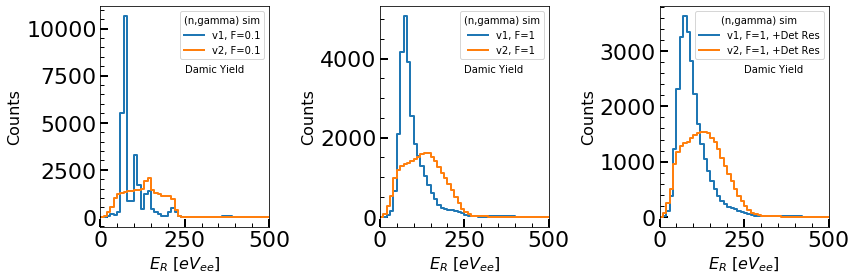

In [14]:
fig, ax = plt.subplots(1,3,figsize=(12.0,4.0),sharex=True)

ax[0].step(Ebin_ctr,NG_v1_Fp1,where='mid',label='v1, F=0.1')
ax[0].step(Ebin_ctr,NG_v2_Fp1,where='mid',label='v2, F=0.1')

ax[1].step(Ebin_ctr,NG_v1_F1,where='mid',label='v1, F=1')
ax[1].step(Ebin_ctr,NG_v2_F1,where='mid',label='v2, F=1')

ax[2].step(Ebin_ctr,NG_v1_F1_det,where='mid',label='v1, F=1, +Det Res')
ax[2].step(Ebin_ctr,NG_v2_F1_det,where='mid',label='v2, F=1, +Det Res')


for axi in ax:
    axi.set_xlim(0,500)
    axi.set_xlabel(r'$E_R~[eV_{ee}]$',fontsize=16)
    axi.set_ylabel('Counts',fontsize=16)
    axi.legend(title='(n,gamma) sim')
    axi.annotate('Damic Yield', xy=(0, 0), xytext=(0.5, 0.7), textcoords='axes fraction')

plt.tight_layout()
plt.savefig('figures/n_gamma_spectrum_version_compare.png')

In [ ]:
np.argmax(NG_v2_F1_det)/np.argmax(NG_v1_F1_det)